# Strategies for weighting the intrinsic reward

## Sigmoid decay (or parametric decay in Andres2022)

In [2]:
import matplotlib.pyplot as plt
import math

class ParameterDecay:

    def __init__(self, start, finish, n_steps, fn="linear", smooth_param=2.0):
        self.start = start
        self.finish = finish
        self.diff = self.start - self.finish
        self.n_steps = n_steps
        if not fn in ["linear", "exp", "sigmoid"]:
            print("ERROR: bad fn param, must be in [linear, exp, sigmoid].")
            exit()
        self.fn = fn
        self.smooth_param = smooth_param

    def get_explo_rate(self, step_i):
        exp_pct_remain = max(0, 1 - step_i / self.n_steps)
        if self.fn == "linear":
            return self.finish + self.diff * exp_pct_remain
        elif self.fn == "exp":
            return self.diff * math.exp(self.smooth_param * (exp_pct_remain - 1)) \
                    * exp_pct_remain + self.finish
        elif self.fn == "sigmoid":
            return self.diff / ((1 + math.exp(-16 * exp_pct_remain / self.smooth_param)) ** 20) + self.finish

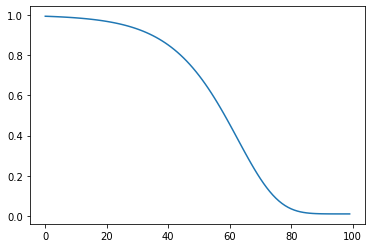

In [57]:
eps = ParameterDecay(1, 0.01, 100, "sigmoid", 2)
steps = list(range(100))
plt.plot(steps, [eps.get_explo_rate(i) for i in steps])

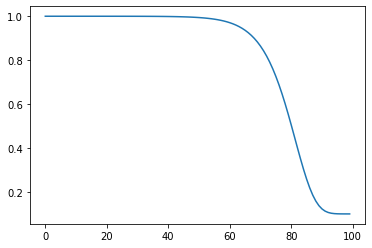

In [4]:
eps = ParameterDecay(1, 0.1, 100, "sigmoid", 1)
steps = list(range(100))
plt.plot(steps, [eps.get_explo_rate(i) for i in steps])

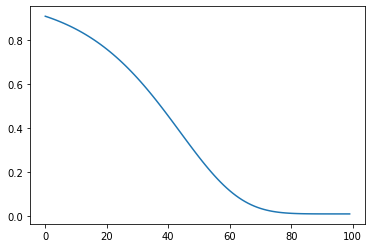

In [20]:
eps = ParameterDecay(1, 0.01, 100, "sigmoid", 3)
steps = list(range(100))
plt.plot(steps, [eps.get_explo_rate(i) for i in steps])